# Amazon Stock Price (2015-2021)
* Exploratory Data Analysis (EDA)
* Linear Regression
* LSTM


In [98]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, ensemble
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
import math
from sklearn.metrics import mean_squared_error
from matplotlib import cm
import seaborn as sns
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_regression
import time
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action="ignore")

## Exploratory Data Analysis

In [51]:
db = pd.read_csv('Amazon.csv')
db.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [52]:
db.set_index('Date',inplace = True)
db.index =  pd.to_datetime(db.index,format='%Y-%m-%d')
db.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400


In [53]:
amazon = db['2015':'2021']

Text(0.5, 1.0, 'Open - Close Adjustments')

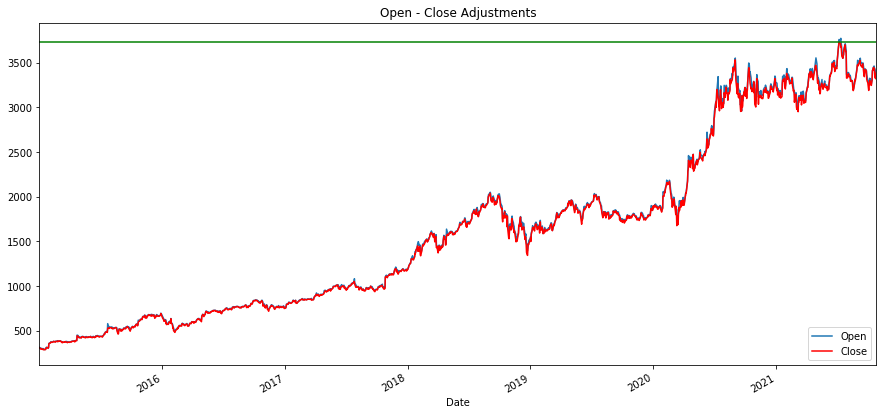

In [54]:
f1 = amazon.iloc[:,1]
f2 = amazon.iloc[:,4]
f1.plot(label='Open',figsize=(15,7),legend='Open')
f2.plot(label='Close',color='red',legend = 'Close')
m = max(f2)
plt.axhline(m,color='green')
plt.title('Open - Close Adjustments')

Text(0.5, 1.0, 'Stock Volume')

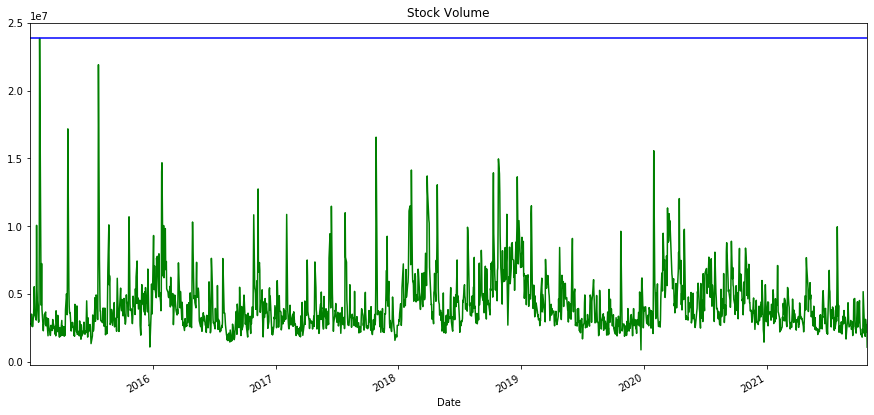

In [55]:
vol = amazon.iloc[:,5]
vol.plot(label='Volume',figsize=(15,7),color='green')
plt.axhline(max(vol),color='blue')
plt.title('Stock Volume')

Text(0.5, 1.0, 'Trend')

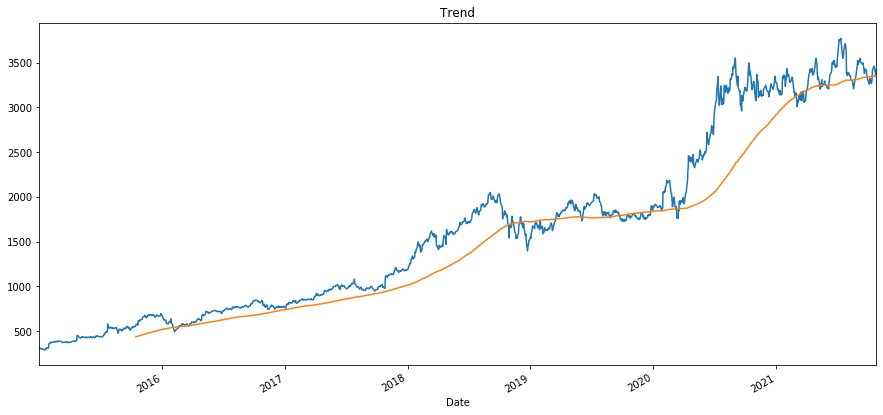

In [56]:
Open = f1.rolling(200).mean()
f1.plot(figsize=(15,7))
Open.plot()
plt.title('Trend')

In [57]:
amazon_daily_returns = f2.pct_change()
amazon_monthly_returns = f2.resample('M').ffill().pct_change()

In [58]:
print(amazon_daily_returns)

Date
2015-01-02         NaN
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
                ...   
2021-10-21    0.005842
2021-10-22   -0.028955
2021-10-25   -0.004551
2021-10-26    0.016775
2021-10-27    0.005960
Name: Adj Close, Length: 1718, dtype: float64


In [59]:
print(amazon_monthly_returns)

Date
2015-01-31         NaN
2015-02-28    0.072293
2015-03-31   -0.021202
2015-04-30    0.133512
2015-05-31    0.017663
                ...   
2021-06-30    0.067355
2021-07-31   -0.032722
2021-08-31    0.043034
2021-09-30   -0.053518
2021-10-31    0.033835
Freq: M, Name: Adj Close, Length: 82, dtype: float64


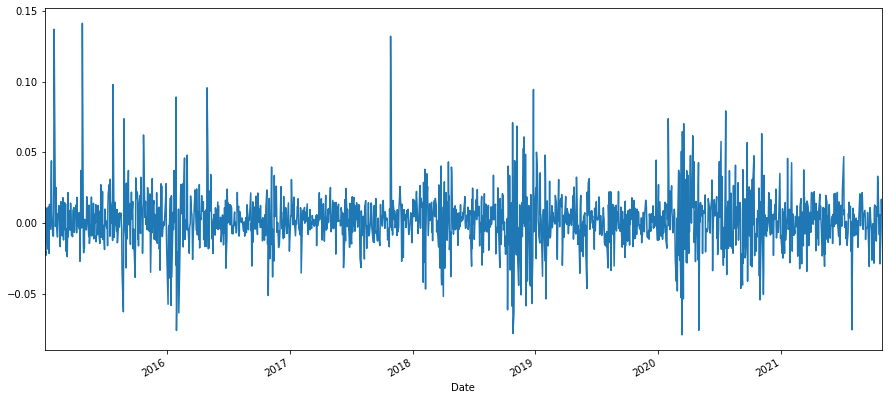

In [60]:
amazon_daily_returns.plot(label='Daily Return',figsize=(15,7))

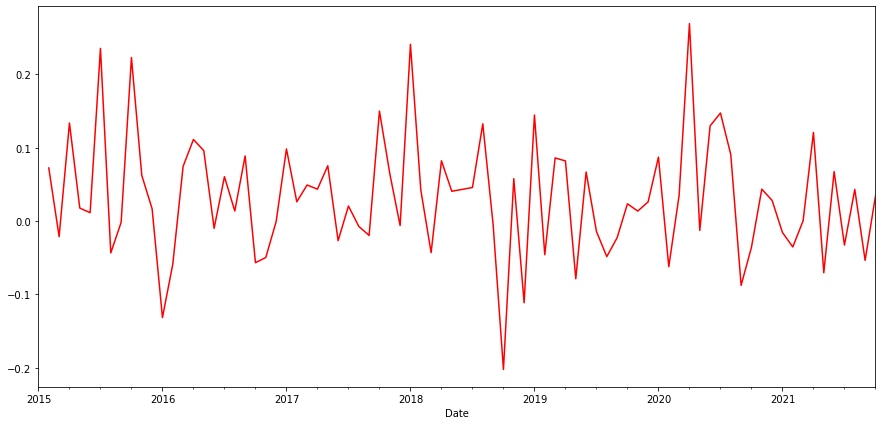

In [61]:
amazon_monthly_returns.plot(label='Monthly Return',figsize=(15,7),color='red')

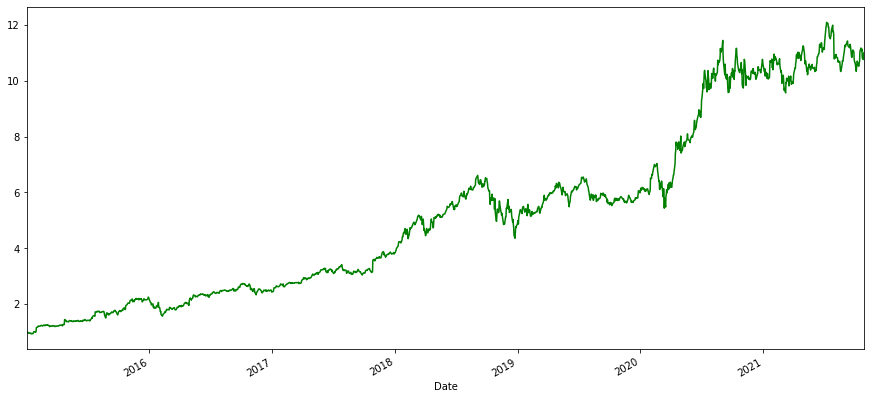

In [62]:
amazon_cum_returns = (amazon_daily_returns +1).cumprod()
amazon_cum_returns.plot(label='Cumulative Returns',color='green',figsize=(15,7))

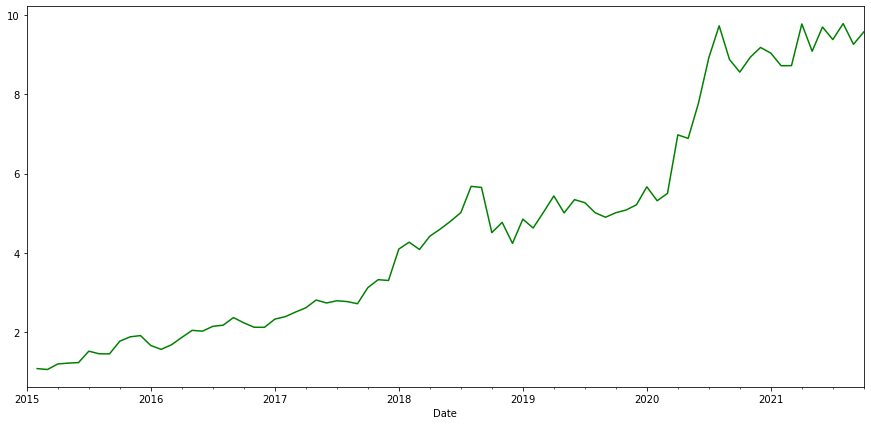

In [63]:
amazon_cum_returns = (amazon_monthly_returns +1).cumprod()
amazon_cum_returns.plot(label='Cumulative Returns',color='green',figsize=(15,7))

## Linear Regression

In [64]:
X = amazon.drop(['Close'],axis=1)
y = amazon.iloc[:,4]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X_train1 = sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1) 
lm = sm.OLS(y_train1, X_train1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.978e+28
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:28:37   Log-Likelihood:                 25893.
No. Observations:                1202   AIC:                        -5.177e+04
Df Residuals:                    1196   BIC:                        -5.174e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         5.4e-13   9.73e-12      0.055      0.956   -1.86e-11    1.96e-11
Open       -2.753e-14    2.5e-13     -0.110      0.912   -5.17e-13    4.62e-13
High        1.066e-14   2.92e-13      0.036      0.971   -5.63e-13    5.84e-13
Low        -3.553e-15   2.69e-13     -0.013      0.989    -5.3e-13    5.23e-13
Adj Close      1.0000   2.55e-13   3.93e+12      0.000       1.000       1.000
Volume       2.21e-17    1.8e-18     12.251      0.000    1.86e-17    2.56e-17
==============================================================================
Omnibus:                      758.713   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10568.967
Skew:                          -2.705   Prob(JB):                         0.00
Kurtosis:                      16.481   Cond. No.                     1.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
ypred = lm.predict(X_train1)
print(ypred)

Date
2017-11-02    1094.219971
2020-05-15    2409.780029
2018-06-29    1699.800049
2021-01-11    3114.209961
2016-04-21     631.000000
                 ...     
2019-07-01    1922.189941
2020-02-25    1972.739990
2018-06-04    1665.270020
2020-10-19    3207.209961
2019-06-25    1878.270020
Length: 1202, dtype: float64


In [67]:
response = lm.predict(X_test1)
print(response)

Date
2017-05-19     959.840027
2020-05-12    2356.949951
2015-06-18     439.390015
2015-07-17     483.010010
2016-05-09     679.750000
                 ...     
2017-10-03     957.099976
2021-10-08    3288.620117
2019-08-30    1776.290039
2019-04-10    1847.329956
2017-02-15     842.700012
Length: 516, dtype: float64


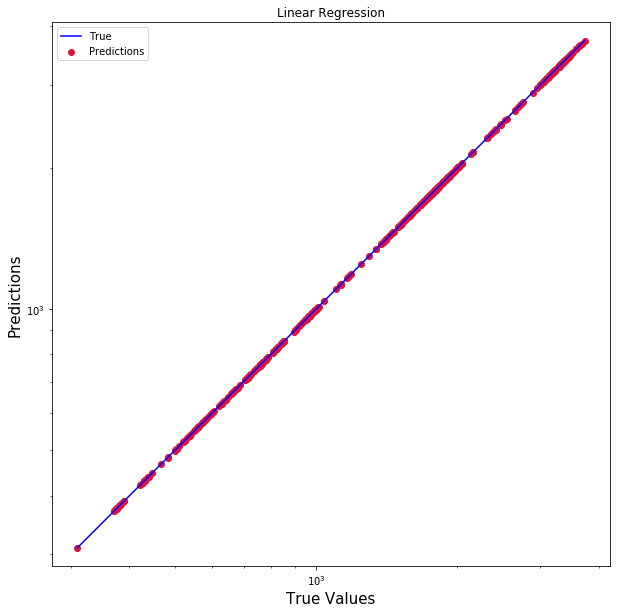

In [68]:
plt.figure(figsize = (10, 10))
plt.scatter(y_test1, response, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(response), max(y_test1))
p2 = min(min(response), min(y_test1))
plt.plot([p1, p2], [p1, p2], 'b-')
lines1 = plt.xlabel('True Values', fontsize = 15)
lines2 = plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.title("Linear Regression")
plt.legend(['True','Predictions'])
plt.show()

## Neural Network LSTM

In [175]:
data = amazon.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .9))
training_data_len

1547

In [176]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00626222],
       [0.00442449],
       [0.00242128],
       ...,
       [0.8806664 ],
       [0.89683728],
       [0.90267851]])

In [177]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00626222, 0.00442449, 0.00242128, 0.00332999, 0.00392223,
       0.0028974 , 0.00129483, 0.0022616 , 0.00183482, 0.        ,
       0.00110031, 0.0007229 , 0.00299031, 0.00678481, 0.00738577,
       0.00659319, 0.00574836, 0.00492385, 0.00720867, 0.01961991,
       0.0225057 , 0.0222386 , 0.02258699, 0.02524053, 0.02535375,
       0.02427376, 0.02498214, 0.02560343, 0.02619279, 0.02754568,
       0.02568762, 0.02508956, 0.02672407, 0.02807697, 0.02705504,
       0.02660504, 0.02857342, 0.02840793, 0.02706084, 0.02865761,
       0.02835277, 0.02780407, 0.0292876 , 0.02704052, 0.02659633,
       0.02396892, 0.02305731, 0.02534214, 0.02427956, 0.02508376,
       0.0246686 , 0.02560343, 0.02505182, 0.026576  , 0.02559472,
       0.02529859, 0.02438988, 0.02334183, 0.02427376, 0.02544375])]
[0.024720855075130943]

[array([0.00626222, 0.00442449, 0.00242128, 0.00332999, 0.00392223,
       0.0028974 , 0.00129483, 0.0022616 , 0.00183482, 0.        ,
       0.00110031, 0.0007229 , 0.0

In [180]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1487/1487 [==============================] - 128s 86ms/sample - loss: 0.0015


In [181]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test))))
rmse

0.09988953621252004

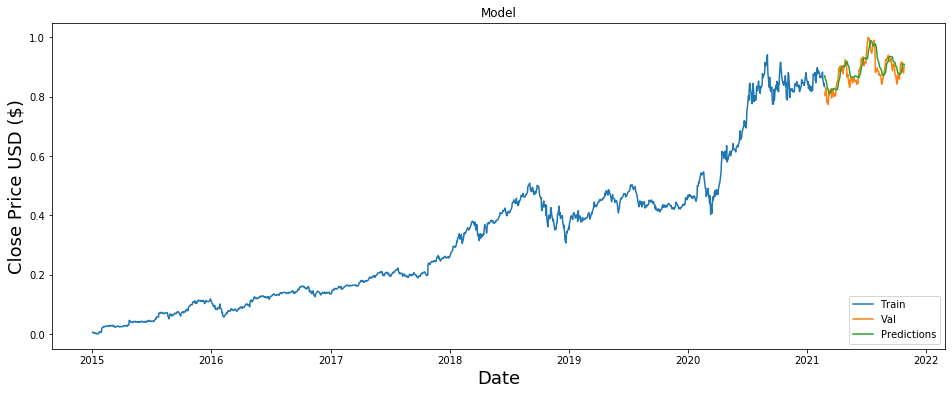

In [182]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Wine Quality Detection
* Exploratory Data Analysis (EDA)
* Logistic Regression (LR)
* Support Vector Machine (SVC)
* Gradiend Boosting (GB)
* Neural Network (No Weighted)
* Neural Network (Weighted)

## Exploratory Data Analysis

In [75]:
df = pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [77]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [78]:
df['quality'] =(df['quality']>= 7).astype(int)  
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [79]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

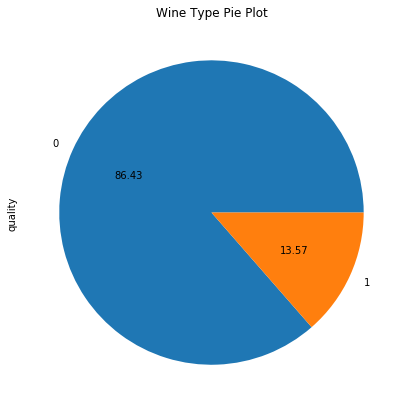

In [80]:
df['quality'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(15,7))
plt.title('Wine Type Pie Plot');

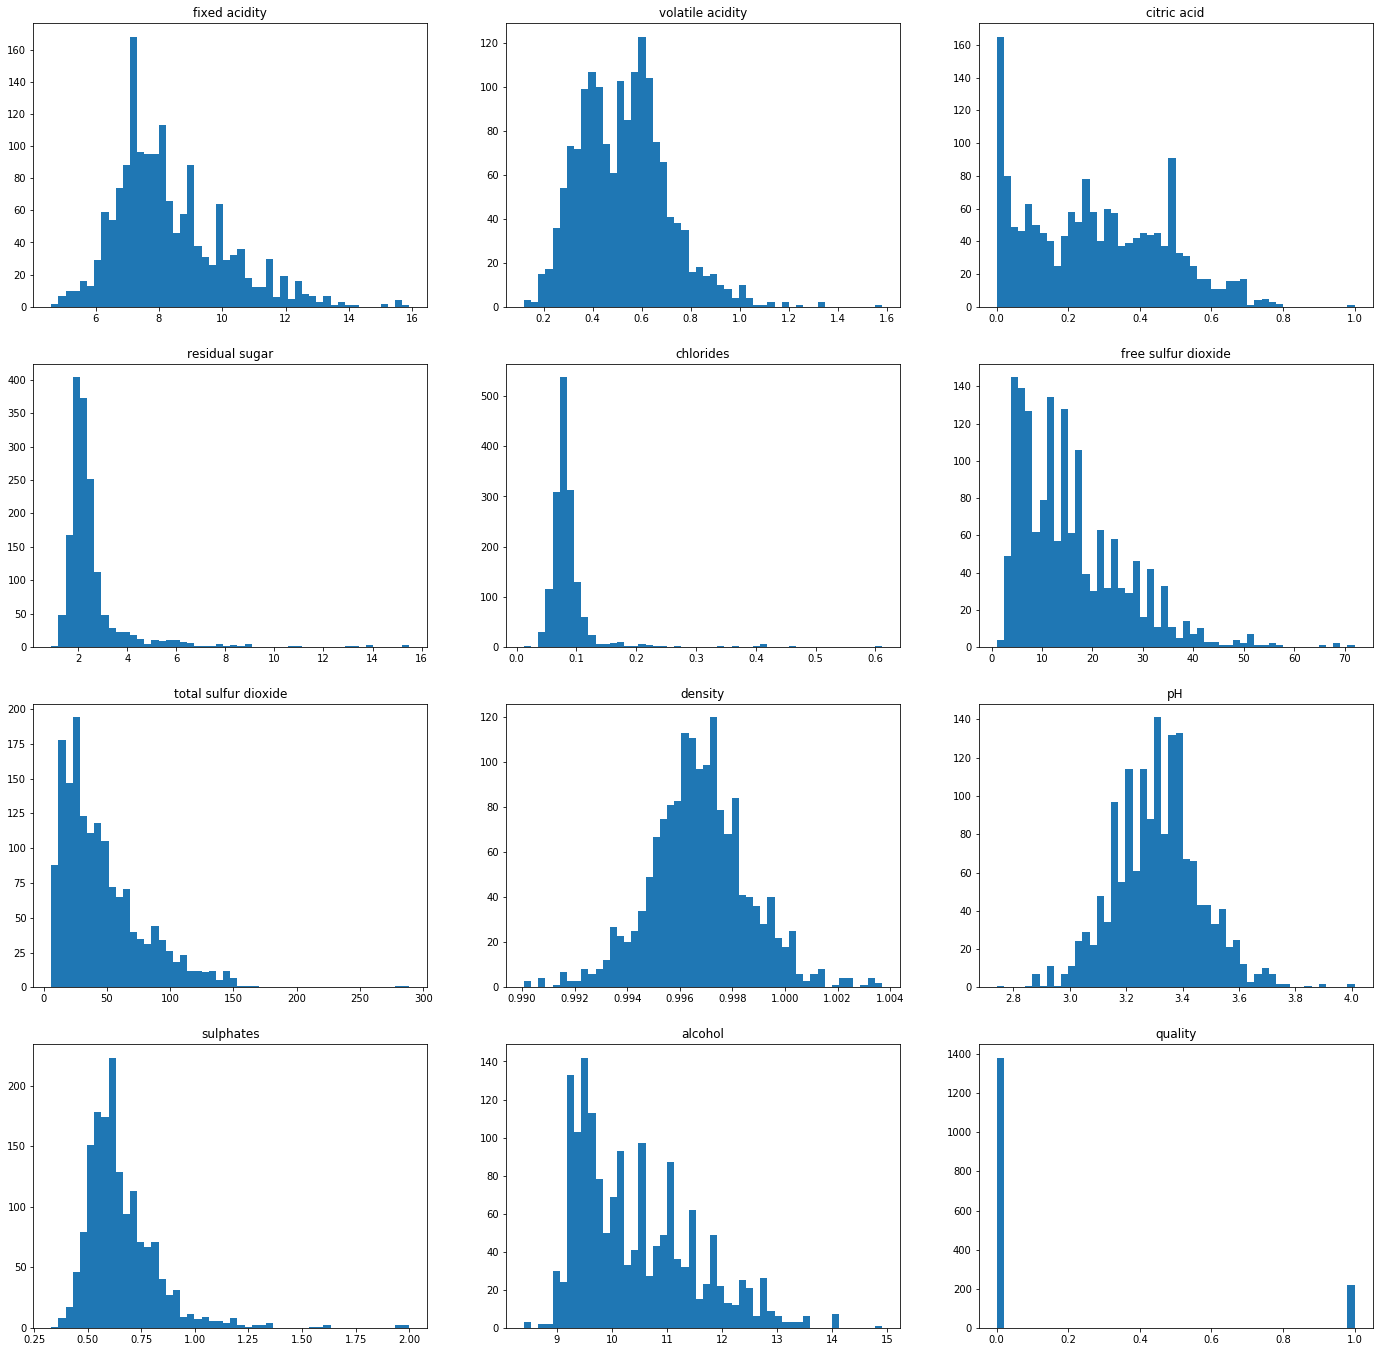

In [81]:
fig, axs = plt.subplots(4,3,figsize=(24,24))
i=0
j=0
for col in df.columns:
    try:
        axs[j,i].hist(df[col],bins=50)
        axs[j,i].set_title(col)
        i+=1
        if i==3:
            i=0
            j+=1
    except:
        continue

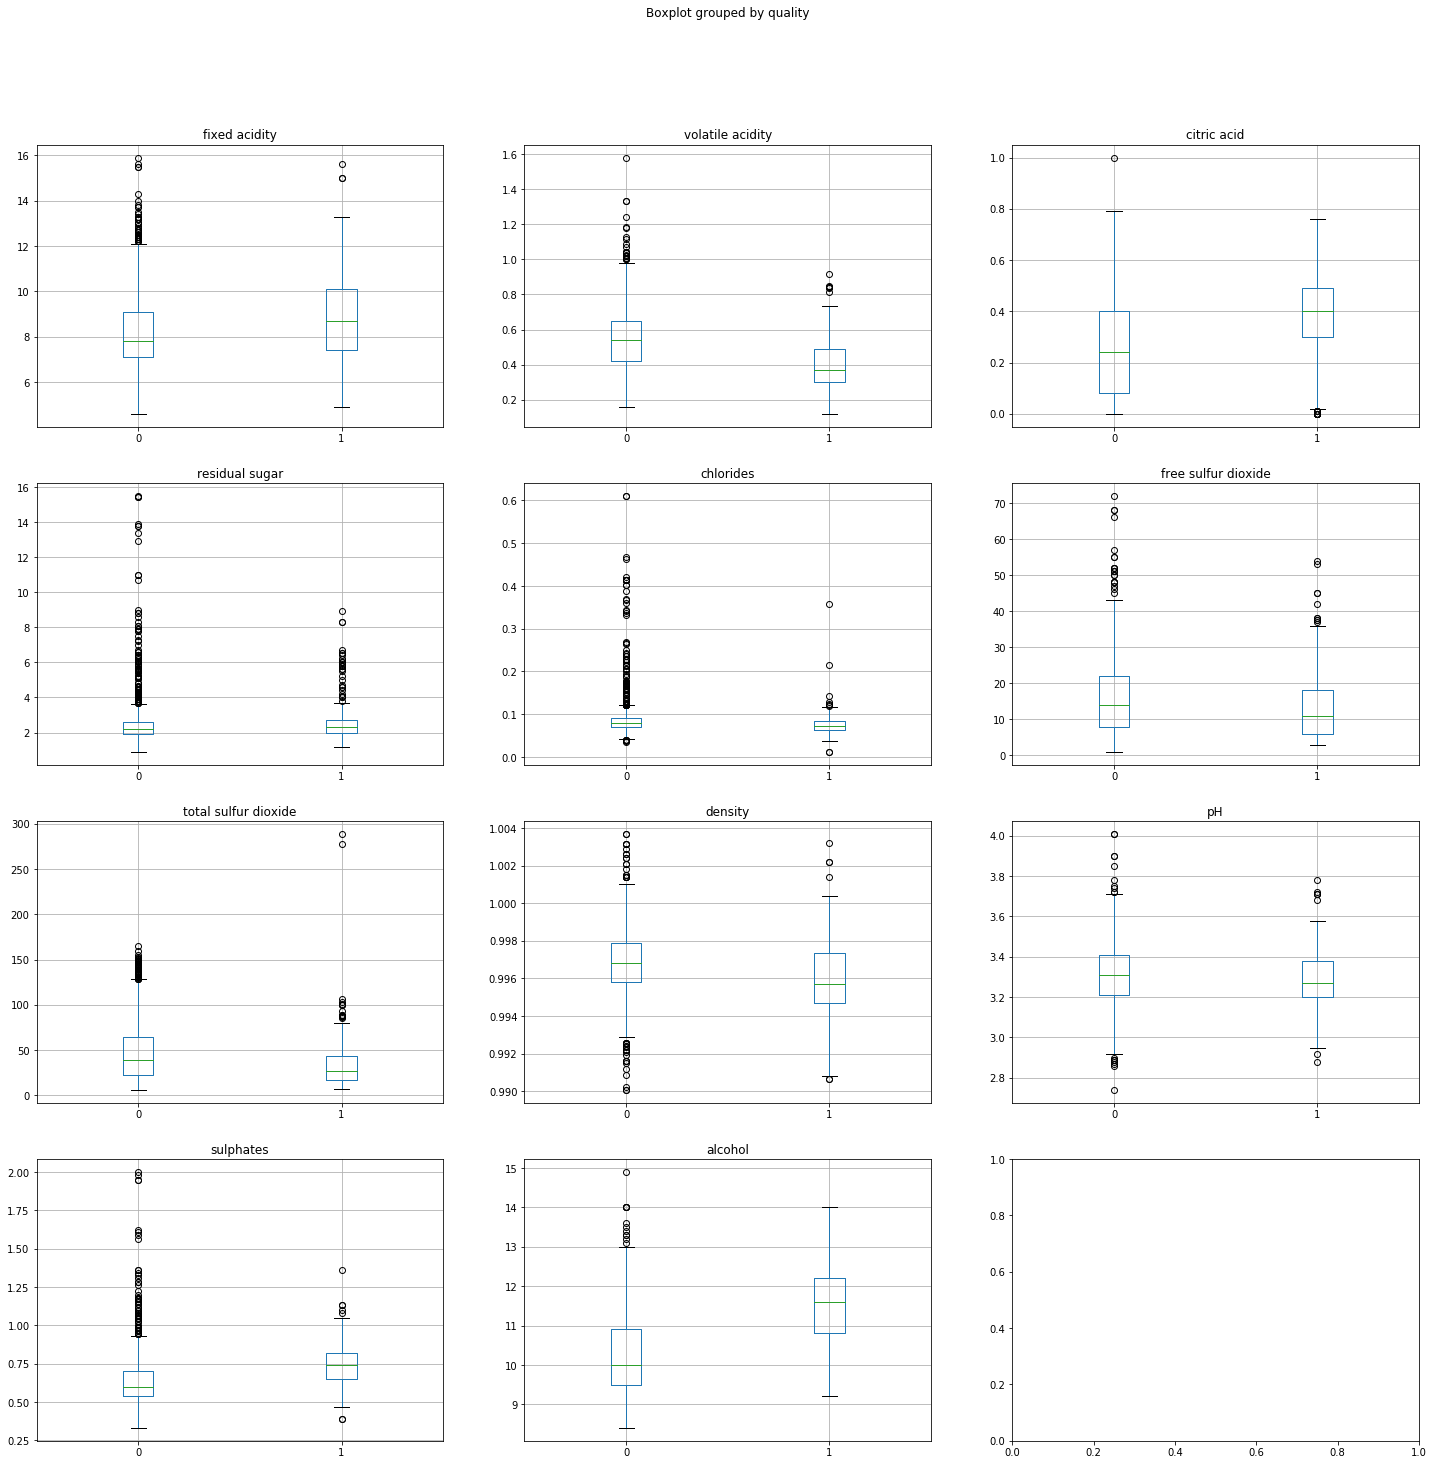

In [82]:
columns=df.drop(['quality'],axis=1).columns
fig, axs = plt.subplots(4,3,figsize=(24,24))
i=0
j=0
for col in columns:
    df.boxplot(column=[col],by='quality',ax=axs[j,i])
    axs[j,i].set_title(col)
    axs[j,i].set(xlabel='')
    i+=1
    if i==3:
        i=0
        j+=1
    ;

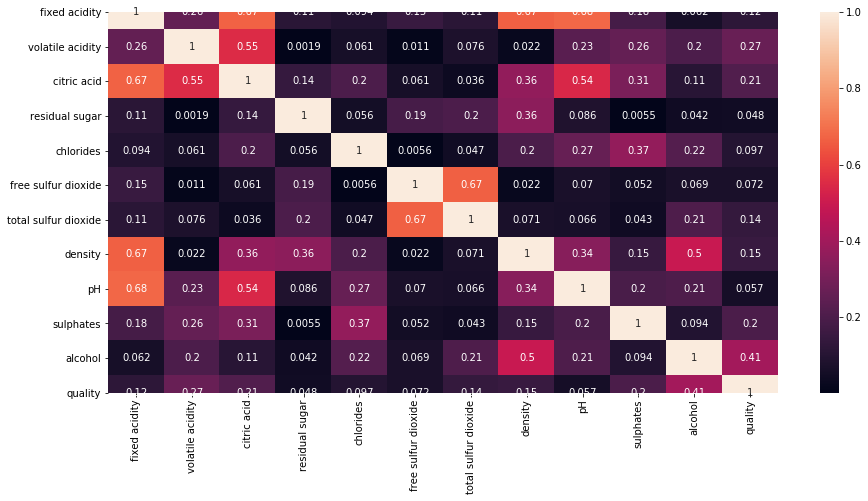

In [83]:
f, ax = plt.subplots(figsize=(15, 7))
corrMatrix = df.corr().abs()
ax = sns.heatmap(corrMatrix, annot=True)
plt.show()

In [84]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
df1 = pd.DataFrame(df.drop(df[to_drop], axis=1))

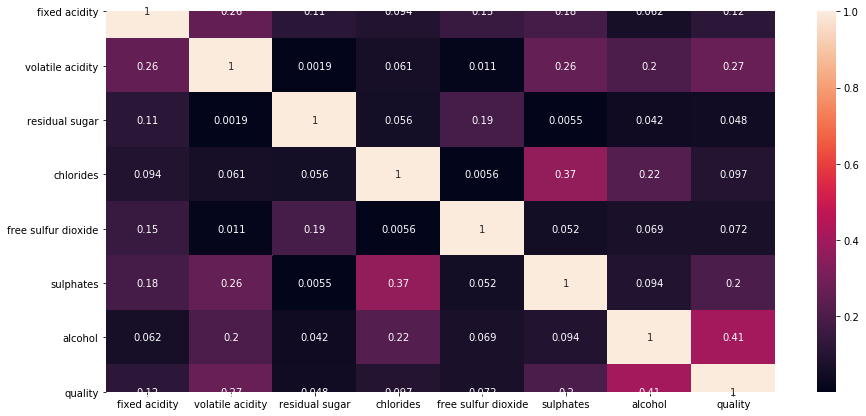

In [85]:
f, ax = plt.subplots(figsize=(15, 7))
corrMatrix = df1.corr().abs()
ax = sns.heatmap(corrMatrix, annot=True)
plt.show()

## Logistic Regression

In [86]:
X = df1.iloc[:, :len(df1.columns)-1]
y = df1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
start = time.time()
model_lr = LogisticRegression()
grid = {"C": np.logspace(-3,3,7),
        "penalty": ["l1","l2"]} # l1 (Lasso), l2 (Ridge)
log_reg = RandomizedSearchCV(model_lr, grid, cv=10)
log_reg.fit(X_train, y_train)
yhat = log_reg.predict(X_test)
end = time.time()
LogistiRegression_time = end-start
print("Fit Time: ",end-start)
print("Best parameters: ",log_reg.best_params_)
print("Accuracy :",log_reg.best_score_)

Fit Time:  2.166677951812744
Best parameters:  {'penalty': 'l2', 'C': 10.0}
Accuracy : 0.8850639763779528


Confusion matrix, without normalization
[[261  12]
 [ 33  14]]
Normalized confusion matrix
[[0.95604396 0.04395604]
 [0.70212766 0.29787234]]


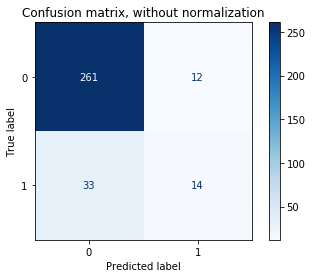

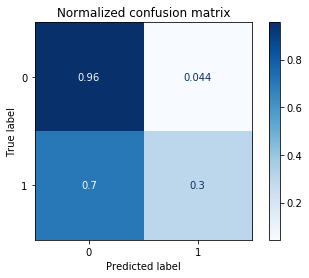

In [88]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_reg, X_test, y_test,                               
                                 cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [89]:
print(metrics.classification_report(y_test, yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.54      0.30      0.38        47

    accuracy                           0.86       320
   macro avg       0.71      0.63      0.65       320
weighted avg       0.84      0.86      0.84       320



## Support Vector Machine 

In [90]:
start = time.time()
model_svc = SVC(probability = True)
grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
svc = RandomizedSearchCV(model_svc, grid, cv=5, n_jobs = -1)
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
end = time.time()
SVC_time = end-start
print("Fit Time: ",end-start)
print("Best parameters: ",svc.best_params_)
print("Accuracy :", svc.best_score_)

Fit Time:  11.347602844238281
Best parameters:  {'kernel': 'rbf', 'gamma': 1, 'C': 1}
Accuracy : 0.8889767156862746


Confusion matrix, without normalization
[[273   0]
 [ 35  12]]
Normalized confusion matrix
[[1.         0.        ]
 [0.74468085 0.25531915]]


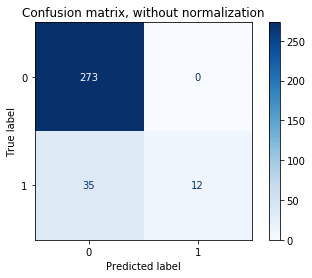

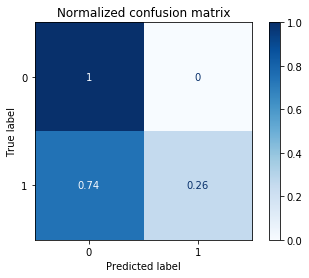

In [91]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [92]:
print(metrics.classification_report(y_test, yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       273
           1       1.00      0.26      0.41        47

    accuracy                           0.89       320
   macro avg       0.94      0.63      0.67       320
weighted avg       0.90      0.89      0.86       320



## Gradient Boosting

In [93]:
start = time.time()
GB = ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=4)
GB.fit(X_train, y_train)
yhat = GB.predict(X_test)
end = time.time()
GB_time = end-start
print("Fit Time: ",end-start)
print("Accuracy: ",GB.score(X_test, y_test))

Fit Time:  2.249666929244995
Accuracy:  0.9


Confusion matrix, without normalization
[[261  12]
 [ 20  27]]
Normalized confusion matrix
[[0.95604396 0.04395604]
 [0.42553191 0.57446809]]


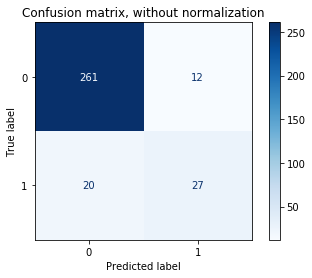

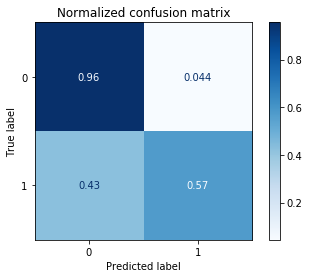

In [94]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GB, X_test, y_test,                               
                                 cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [95]:
print(metrics.classification_report(y_test, yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.69      0.57      0.63        47

    accuracy                           0.90       320
   macro avg       0.81      0.77      0.79       320
weighted avg       0.89      0.90      0.90       320



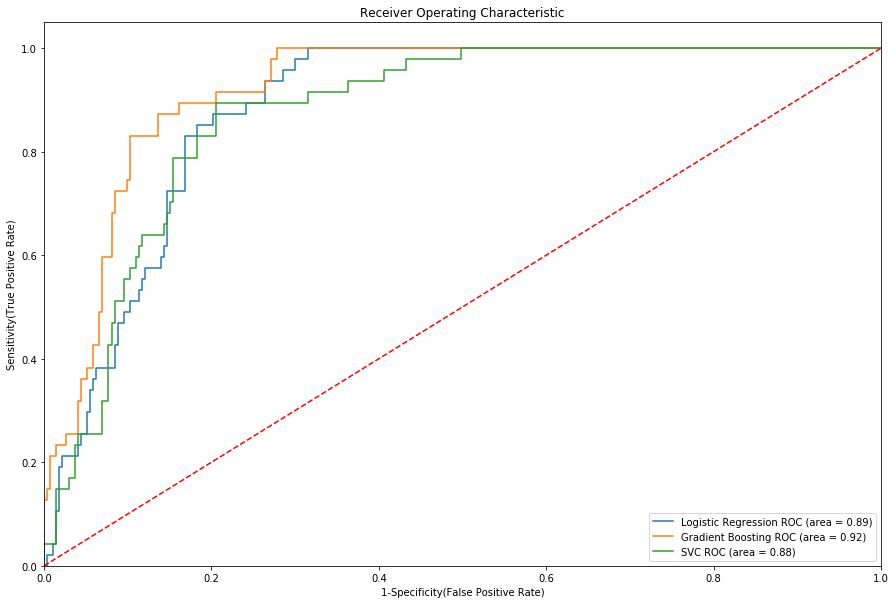

In [96]:
plt.figure(figsize=(15,10))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{   'label': 'SVC',
    'model': SVC(probability = True),
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

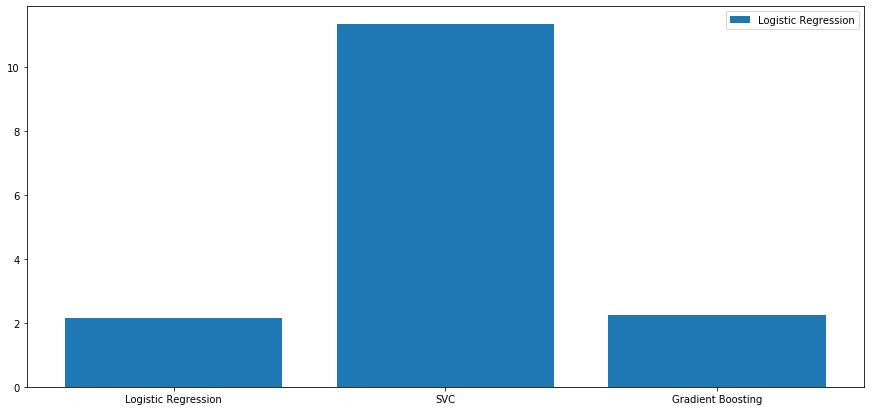

In [97]:
plt.figure(figsize=(15,7))
list_time = {'Logistic Regression':LogistiRegression_time,'SVC':SVC_time,'Gradient Boosting':GB_time}
keys = list_time.keys()
values = list_time.values()
plt.bar(range(len(list_time)), list(list_time.values()), align='center')
plt.xticks(range(len(list_time)), list(list_time.keys()))
plt.legend(['Logistic Regression','SVC','Gradient Boosting'])
plt.show()

## Neural Network (No Weighted)

In [99]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [100]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
model = make_model()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                128       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.predict(X_test)

array([[0.9122982 ],
       [0.98359346],
       [0.9842477 ],
       [0.994661  ],
       [0.9526044 ],
       [0.99412477],
       [0.98309296],
       [0.85145617],
       [0.95079195],
       [0.9200463 ],
       [0.8315661 ],
       [0.78383785],
       [0.94118595],
       [0.98683876],
       [0.9852124 ],
       [0.85795176],
       [0.9010787 ],
       [0.95760036],
       [0.73769283],
       [0.97476935],
       [0.11027229],
       [0.9519148 ],
       [0.86494094],
       [0.6417295 ],
       [0.8738439 ],
       [0.9118219 ],
       [0.35603923],
       [0.8478438 ],
       [0.43579534],
       [0.6057596 ],
       [0.9082255 ],
       [0.6127932 ],
       [0.9313105 ],
       [0.89449656],
       [0.9535936 ],
       [0.901034  ],
       [0.88975966],
       [0.8054936 ],
       [0.9497484 ],
       [0.86120796],
       [0.928813  ],
       [0.8912839 ],
       [0.77411234],
       [0.94928133],
       [0.9303277 ],
       [0.90167004],
       [0.9045377 ],
       [0.941

In [102]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 2.4868


In [103]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [104]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_test, y_test), 
    verbose=0)

In [105]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_test, y_test), 
    verbose=0)

In [106]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

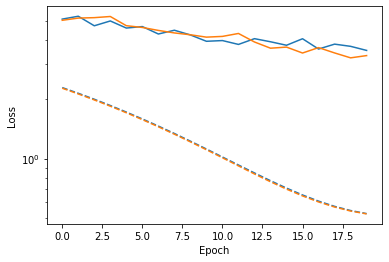

In [107]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [108]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_test, y_test))

Train on 1279 samples, validate on 320 samples
Epoch 1/100
1279/1279 [==============================] - 1s 783us/sample - loss: 5.0072 - tp: 97.0000 - fp: 625.0000 - tn: 484.0000 - fn: 73.0000 - accuracy: 0.4543 - precision: 0.1343 - recall: 0.5706 - auc: 0.5003 - prc: 0.1312 - val_loss: 2.2704 - val_tp: 41.0000 - val_fp: 255.0000 - val_tn: 18.0000 - val_fn: 6.0000 - val_accuracy: 0.1844 - val_precision: 0.1385 - val_recall: 0.8723 - val_auc: 0.4572 - val_prc: 0.1355
Epoch 2/100
1279/1279 [==============================] - 0s 18us/sample - loss: 4.9535 - tp: 99.0000 - fp: 630.0000 - tn: 479.0000 - fn: 71.0000 - accuracy: 0.4519 - precision: 0.1358 - recall: 0.5824 - auc: 0.5065 - prc: 0.1329 - val_loss: 2.1240 - val_tp: 40.0000 - val_fp: 252.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.1906 - val_precision: 0.1370 - val_recall: 0.8511 - val_auc: 0.4575 - val_prc: 0.1355
Epoch 3/100
1279/1279 [==============================] - 0s 15us/sample - loss: 5.2995 - tp: 99.0000 - f

Epoch 21/100
1279/1279 [==============================] - 0s 30us/sample - loss: 3.2387 - tp: 75.0000 - fp: 468.0000 - tn: 641.0000 - fn: 95.0000 - accuracy: 0.5598 - precision: 0.1381 - recall: 0.4412 - auc: 0.5172 - prc: 0.1406 - val_loss: 0.5126 - val_tp: 2.0000 - val_fp: 4.0000 - val_tn: 269.0000 - val_fn: 45.0000 - val_accuracy: 0.8469 - val_precision: 0.3333 - val_recall: 0.0426 - val_auc: 0.4324 - val_prc: 0.1532
Epoch 22/100
1279/1279 [==============================] - 0s 16us/sample - loss: 3.5934 - tp: 63.0000 - fp: 489.0000 - tn: 620.0000 - fn: 107.0000 - accuracy: 0.5340 - precision: 0.1141 - recall: 0.3706 - auc: 0.4406 - prc: 0.1184 - val_loss: 0.5079 - val_tp: 1.0000 - val_fp: 3.0000 - val_tn: 270.0000 - val_fn: 46.0000 - val_accuracy: 0.8469 - val_precision: 0.2500 - val_recall: 0.0213 - val_auc: 0.4320 - val_prc: 0.1513
Epoch 23/100
1279/1279 [==============================] - 0s 14us/sample - loss: 3.2812 - tp: 64.0000 - fp: 441.0000 - tn: 668.0000 - fn: 106.0000 - ac

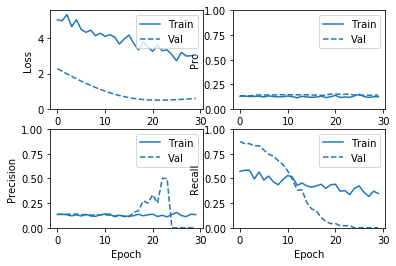

In [109]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
plot_metrics(baseline_history)

In [110]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [111]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(6,6))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.5236634016036987
tp :  2.0
fp :  6.0
tn :  267.0
fn :  45.0
accuracy :  0.840625
precision :  0.25
recall :  0.04255319
auc :  0.4344946
prc :  0.15420985

Legitimate Transactions Detected (True Negatives):  267
Legitimate Transactions Incorrectly Detected (False Positives):  6
Fraudulent Transactions Missed (False Negatives):  45
Fraudulent Transactions Detected (True Positives):  2
Total Fraudulent Transactions:  47


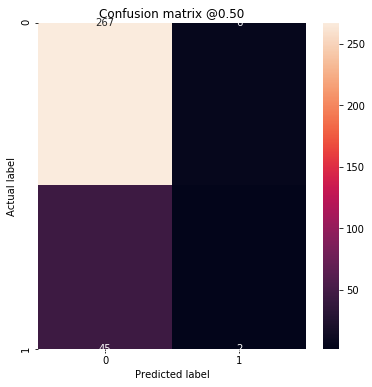

In [112]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()
plot_cm(y_test, test_predictions_baseline)

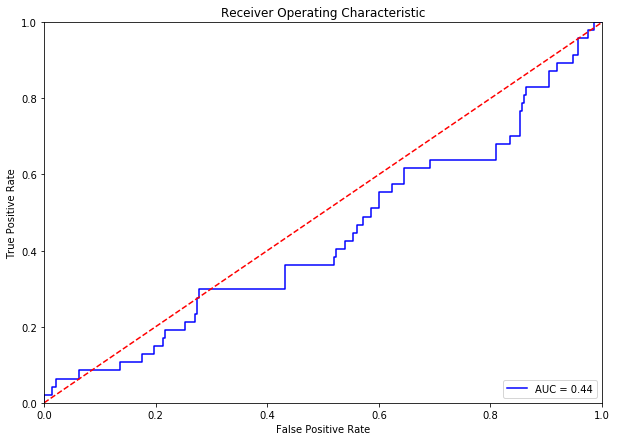

In [126]:
fpr, tpr, threshold = metrics.roc_curve(y_test, test_predictions_baseline)
roc_auc = metrics.auc(fpr, tpr)
    
plt.figure(figsize = (10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Neural Network (Weighted)

In [116]:
neg, pos = np.bincount(df['quality'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1599
    Positive: 217 (13.57% of total)



In [117]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.58
Weight for class 1: 3.68


In [118]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_test, y_test),
    # The class weights go here
    class_weight=class_weight)

Train on 1279 samples, validate on 320 samples
Epoch 1/100
1279/1279 [==============================] - 1s 1ms/sample - loss: 4.3022 - tp: 90.0000 - fp: 674.0000 - tn: 435.0000 - fn: 80.0000 - accuracy: 0.4105 - precision: 0.1178 - recall: 0.5294 - auc: 0.4503 - prc: 0.1183 - val_loss: 2.3380 - val_tp: 43.0000 - val_fp: 257.0000 - val_tn: 16.0000 - val_fn: 4.0000 - val_accuracy: 0.1844 - val_precision: 0.1433 - val_recall: 0.9149 - val_auc: 0.4599 - val_prc: 0.1390
Epoch 2/100
1279/1279 [==============================] - 0s 15us/sample - loss: 4.1407 - tp: 92.0000 - fp: 651.0000 - tn: 458.0000 - fn: 78.0000 - accuracy: 0.4300 - precision: 0.1238 - recall: 0.5412 - auc: 0.4643 - prc: 0.1216 - val_loss: 2.2650 - val_tp: 41.0000 - val_fp: 256.0000 - val_tn: 17.0000 - val_fn: 6.0000 - val_accuracy: 0.1813 - val_precision: 0.1380 - val_recall: 0.8723 - val_auc: 0.4606 - val_prc: 0.1362
Epoch 3/100
1279/1279 [==============================] - 0s 15us/sample - loss: 4.0711 - tp: 99.0000 - fp:

Epoch 21/100
1279/1279 [==============================] - 0s 19us/sample - loss: 3.6753 - tp: 82.0000 - fp: 588.0000 - tn: 521.0000 - fn: 88.0000 - accuracy: 0.4715 - precision: 0.1224 - recall: 0.4824 - auc: 0.4813 - prc: 0.1294 - val_loss: 1.1948 - val_tp: 37.0000 - val_fp: 232.0000 - val_tn: 41.0000 - val_fn: 10.0000 - val_accuracy: 0.2438 - val_precision: 0.1375 - val_recall: 0.7872 - val_auc: 0.4903 - val_prc: 0.1609
Epoch 22/100
1279/1279 [==============================] - 0s 12us/sample - loss: 3.8421 - tp: 84.0000 - fp: 591.0000 - tn: 518.0000 - fn: 86.0000 - accuracy: 0.4707 - precision: 0.1244 - recall: 0.4941 - auc: 0.4764 - prc: 0.1275 - val_loss: 1.1668 - val_tp: 37.0000 - val_fp: 232.0000 - val_tn: 41.0000 - val_fn: 10.0000 - val_accuracy: 0.2438 - val_precision: 0.1375 - val_recall: 0.7872 - val_auc: 0.4915 - val_prc: 0.1618
Epoch 23/100
1279/1279 [==============================] - 0s 15us/sample - loss: 3.4599 - tp: 88.0000 - fp: 555.0000 - tn: 554.0000 - fn: 82.0000 - 

Epoch 41/100
1279/1279 [==============================] - 0s 15us/sample - loss: 3.1651 - tp: 86.0000 - fp: 555.0000 - tn: 554.0000 - fn: 84.0000 - accuracy: 0.5004 - precision: 0.1342 - recall: 0.5059 - auc: 0.4941 - prc: 0.1297 - val_loss: 1.0255 - val_tp: 37.0000 - val_fp: 225.0000 - val_tn: 48.0000 - val_fn: 10.0000 - val_accuracy: 0.2656 - val_precision: 0.1412 - val_recall: 0.7872 - val_auc: 0.5201 - val_prc: 0.1848
Epoch 42/100
1279/1279 [==============================] - 0s 14us/sample - loss: 3.2046 - tp: 90.0000 - fp: 588.0000 - tn: 521.0000 - fn: 80.0000 - accuracy: 0.4777 - precision: 0.1327 - recall: 0.5294 - auc: 0.4990 - prc: 0.1318 - val_loss: 1.0232 - val_tp: 36.0000 - val_fp: 225.0000 - val_tn: 48.0000 - val_fn: 11.0000 - val_accuracy: 0.2625 - val_precision: 0.1379 - val_recall: 0.7660 - val_auc: 0.5214 - val_prc: 0.1852
Epoch 43/100
1279/1279 [==============================] - 0s 15us/sample - loss: 3.2254 - tp: 83.0000 - fp: 580.0000 - tn: 529.0000 - fn: 87.0000 - 

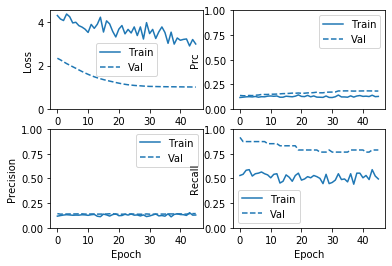

In [119]:
plot_metrics(weighted_history)

In [120]:
train_predictions_weighted = weighted_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(X_test, batch_size=BATCH_SIZE)

loss :  1.0322965383529663
tp :  36.0
fp :  224.0
tn :  49.0
fn :  11.0
accuracy :  0.265625
precision :  0.13846155
recall :  0.7659575
auc :  0.51621073
prc :  0.1853725

Legitimate Transactions Detected (True Negatives):  49
Legitimate Transactions Incorrectly Detected (False Positives):  224
Fraudulent Transactions Missed (False Negatives):  11
Fraudulent Transactions Detected (True Positives):  36
Total Fraudulent Transactions:  47


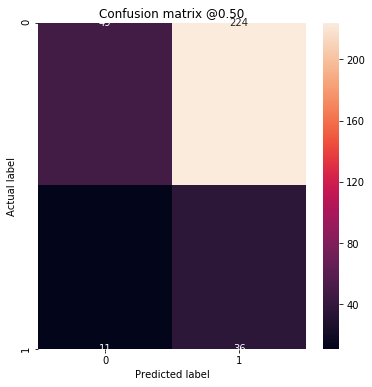

In [121]:
weighted_results = weighted_model.evaluate(X_test, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_weighted)

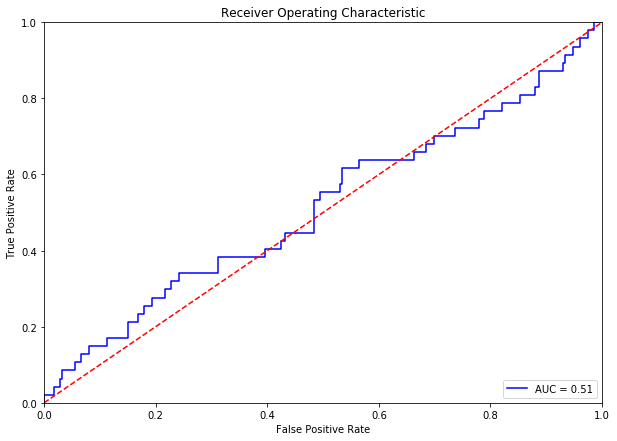

In [125]:
fpr, tpr, threshold = metrics.roc_curve(y_test, test_predictions_weighted)
roc_auc = metrics.auc(fpr, tpr)
    
plt.figure(figsize = (10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()